In [1]:
# build a use case of clinic with different self report levels are tested
%reload_ext autoreload
%autoreload 2
import numpy as np
from weargroup_v2 import do_some_sets,plot_the_clinic_sets
N = 100000
#N = 1000
fn =f'clinicMonster_selfrep_v2with{N}.csv'
#
#df = do_some_sets(inflater=2/3,sLIST = [1,.9,.8,.7,.6,.5],fLIST= [ 0,1/90,3/90,10/90,30/90,1,3 ],N=N,NOFIG=True,fn='clinicMonster.csv',clinTF=True)
#dfi = do_some_sets(inflater=2/3,sLIST = [1,.9,.8,.7,.6,.5],fLIST= [ 0,1/90,3/90,10/90,30/90,1,3 ],N=N,NOFIG=True,fn='clinicMonster_i.csv',clinTF=False)
df = do_some_sets(inflater=2/3,sLIST = [1,.9,.8,.7,.6,.5,.4,.3,.2,.1,0],fLIST= [ 1/30 ],
                  N=N,NOFIG=True,fn=fn,clinTF=True,biggerCSV=True,
                  doDISCOUNT=True,findSteady=True,numCPUs=9)
#df = do_some_sets(inflater=2/3,sLIST = [1,.9,.8,.7,.6,.5,.4,.3,.2,.1],fLIST= [ 0 ],N=N,NOFIG=True,fn='clinicMonster_selfRep.csv',clinTF=True,biggerCSV=True)
#plot_the_clinic_sets('clinicMonster_selfRep.csv','clinicMonster_i.csv','Figure3-clinic_case.tif')

sensitivity:   0%|          | 0/11 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

   sens       FAR   szfree  meanDrug    meanSz  how_long
0   1.0  0.033333  0.56880  1.948718  1.196581      81.0
0   0.9  0.033333  0.56222  1.948718  1.205128      81.0
0   0.8  0.033333  0.56166  1.923077  1.213675      81.0
0   0.7  0.033333  0.55751  1.897436  1.230769      81.0
0   0.6  0.033333  0.55437  1.871795  1.239316      78.0
0   0.5  0.033333  0.55270  1.820513  1.273504      78.0
0   0.4  0.033333  0.54752  1.743590  1.282051      75.0
0   0.3  0.033333  0.53731  1.615385  1.307692      75.0
0   0.2  0.033333  0.52060  1.435897  1.376068      69.0
0   0.1  0.033333  0.49223  1.205128  1.504274      60.0
0   0.0  0.033333  0.00000  0.000000  4.367521      12.0


           FAR   szfree  meanDrug    meanSz  how_long sens
sens                                                      
0.0   0.033333  0.00000  0.000000  4.367521      12.0  0.0
0.1   0.033333  0.49223  1.205128  1.504274      60.0  0.1
0.2   0.033333  0.52060  1.435897  1.376068      69.0  0.2
0.3   0.033333  0.53731  1.615385  1.307692      75.0  0.3
0.4   0.033333  0.54752  1.743590  1.282051      75.0  0.4
0.5   0.033333  0.55270  1.820513  1.273504      78.0  0.5
0.6   0.033333  0.55437  1.871795  1.239316      78.0  0.6
0.7   0.033333  0.55751  1.897436  1.230769      81.0  0.7
0.8   0.033333  0.56166  1.923077  1.213675      81.0  0.8
0.9   0.033333  0.56222  1.948718  1.205128      81.0  0.9
1.0   0.033333  0.56880  1.948718  1.196581      81.0  1.0


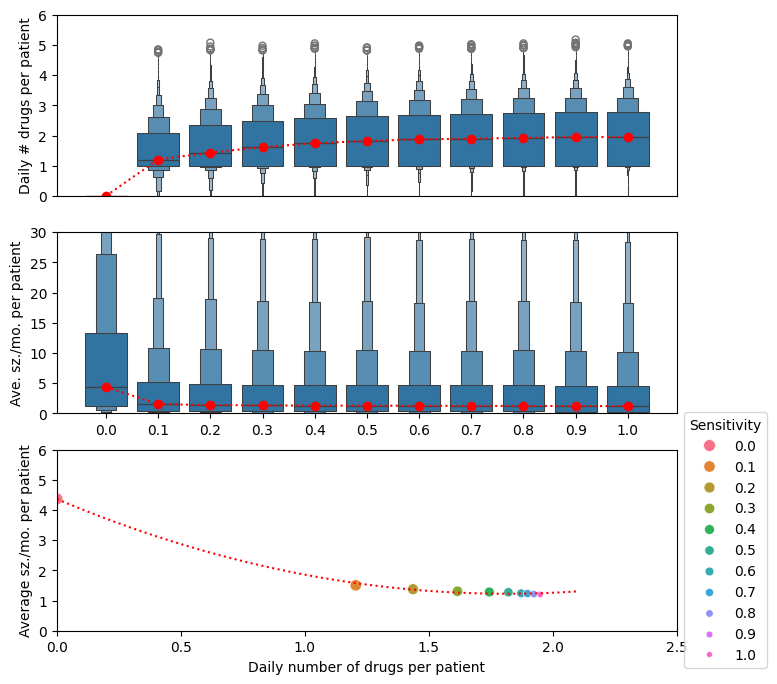

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

N = 100000
#N = 1000
fn =f'clinicMonster_selfrep_v2with{N}.csv'

#fn = 'clinicMonster_selfRep_1FPmonthly.csv'
#fn = 'clinicMonster_selfrep_v2with.csv'
plt.figure(figsize=(8,8))
df = pd.read_csv(fn)
df_grouped = df.groupby('sens').median()
df_grouped['sens'] = df_grouped.index
df_grouped['sens'] = df_grouped['sens'].astype('category')


plt.subplot(3,1,1)
sns.boxenplot(data=df,x='sens',y='meanDrug')
#sns.violinplot(data=df,x='sens',y='meanDrug')
#sns.scatterplot(data=df,x='sens',y='meanDrug')
plt.plot([0,1,2,3,4,5,6,7,8,9,10],df_grouped['meanDrug'],linestyle=':',color='r',marker='o')
plt.ylim(0,6)
plt.xticks([])
plt.xlabel('')
plt.ylabel('Daily # drugs per patient')
plt.subplot(3,1,2)
sns.boxenplot(data=df,x='sens',y='meanSz')
#sns.violinplot(data=df,x='sens',y='meanSz')
plt.plot([0,1,2,3,4,5,6,7,8,9,10],df_grouped['meanSz'],linestyle=':',color='r',marker='o')
plt.ylim(0,30)
plt.ylabel('Ave. sz./mo. per patient')
plt.xlabel('')
plt.subplot(3,1,3)
# Group the dataframe by sens and compute the mean of meanSz

ax = sns.scatterplot(data=df_grouped,size='sens',hue='sens',x='meanDrug',y='meanSz')

model = np.poly1d(np.polyfit(df_grouped.meanDrug, df_grouped.meanSz, 2))
polyline = np.linspace(0,2.1, 50)
plt.plot(polyline, model(polyline),'r:',)
plt.legend(loc='center left', title='Sensitivity',bbox_to_anchor=(1, 0.5))
plt.ylim(0,6)
plt.xlim(0,2.5)
plt.xlabel('Daily number of drugs per patient')
plt.ylabel('Average sz./mo. per patient')
#plt.subplot(4,1,4)
#ax = sns.boxenplot(data=df_grouped,x='sens',y='how_long')
#plt.title('Sensitivity vs. how long until med stability')
#plt.xlabel('Sensitivity')
#plt.ylabel('How long (months)')
# Print the result
print(df_grouped)
plt.show()

In [56]:
df_grouped.to_clipboard()
#for i,L in enumerate([0.1,.2,.3,.4,.5,.6,.7,.8,.9])

In [57]:
df_grouped

,FAR,szfree,meanDrug,meanSz,sens
sens,,,,,
0.0,0.033333,0.00000,0.000000,4.341880,0.0
0.1,0.033333,0.49467,1.205128,1.504274,0.1
0.2,0.033333,0.52275,1.410256,1.358974,0.2
0.3,0.033333,0.53655,1.615385,1.307692,0.3
0.4,0.033333,0.54308,1.717949,1.282051,0.4
0.5,0.033333,0.55252,1.794872,1.264957,0.5
0.6,0.033333,0.55667,1.846154,1.239316,0.6
0.7,0.033333,0.55916,1.897436,1.222222,0.7
0.8,0.033333,0.55987,1.923077,1.209402,0.8


In [1]:
from realSim import simulator_base

x = simulator_base(sampRATE=1,number_of_days=100)


(1,)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [1]:
import numpy as np
from weargroup_v2 import sim1clinic
#N = 100000

sim1clinic(sens=1,FAR=0,clinic_interval=3,clinTF=True,L=120,inflater=2/3,doDISCOUNT=True,findSteady=True)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
from huggingface_hub import snapshot_download
snapshot_download(repo_id="lysandre/arxiv-nlp")
'/home/lysandre/.cache/huggingface/hub/models--lysandre--arxiv-nlp/snapshots/894a9adde21d9a3e3843e6d5aeaaf01875c7fade'


In [25]:
import scipy